In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random #generating negative random numbers

from mpl_toolkits.mplot3d import Axes3D # for 3D visualization

from tqdm import tqdm, trange #loading status




In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
cd

/Users/reuschenbachjosefine


In [4]:
cd ComputationalNeuroscienceUnit/pycabnn-MLI

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI


In [5]:
ls

LICENSE.txt                    pycabnn/
README.md                      requirements.txt
SnipsForEPointOnSphere.ipynb   run_connector.py*
environment.yml                run_connector_MLI.py*
generate_cell_position.py*     start_ipcluster.sh
generate_cell_position_mli.py* temp_arra.npz
movie_figs/                    test_data/
movie_figs_1/                  testsave.npz
notebooks/                     unpack_db.py*
optional-requirements.txt


In [6]:
somas=np.loadtxt("test_data/MLI_20000/MLIcoordinates.dat")
# somas = somas['mli']
somas[:5]

array([[ 260.49691676,  240.67988039,  322.96117708],
       [1465.06295851,  597.04816666,  306.79052032],
       [ 472.20029745,  592.2483781 ,  291.51042226],
       [ 244.05444309,  228.43872702,  407.48067531],
       [ 431.83855078,  462.50694568,  413.37245933]])

In [7]:
import pycabnn.generate_cell_position_mli as pop

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI/pycabnn/connector.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [8]:
from neuron import h
h.load_file('test_data/params/Parameters.hoc')

Nseg for APical is 5 and Basal is 3
	36 


1.0

In [9]:
import pycabnn.cell_population as pop

In [10]:
mlipop = pop.MLI_pop(h)

In [11]:
mlipop.load_somata(somas)

In [12]:
mlipop.load_data('testsave.npz')

#### Import npz file and check attributes

In [23]:
cd ..

/Users/reuschenbachjosefine


In [24]:
cd ComputationalNeuroscienceUnit/pycabnn-MLI


/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI


In [25]:
MLI=np.load("test_data/MLI_20000/MLIdata_20210705.npz", mmap_mode='r')

In [26]:
for k in MLI.files:
    print(k)

dendpoints
segments
ids


In [27]:
DendPointAllAll= MLI["dendpoints"]
segs_all= MLI["segments"]
dendpt_ids_all= MLI["ids"]

In [28]:
segs_all.shape

(7158600, 2)

#### Query Point

In [29]:
cd

/Users/reuschenbachjosefine


In [30]:
cd ComputationalNeuroscienceUnit/pycabnn-MLI/pycabnn/

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI/pycabnn


In [31]:
import util as util

In [32]:
qpts = util.Query_point(DendPointAllAll, dendpt_ids_all, segs_all)

In [33]:
dendpts100 = qpts.coo[qpts.idx<100,:]
ids100 = qpts.idx[qpts.idx<100]
seg100 = qpts.seg[qpts.idx<100,:]

In [34]:
seg100.shape

(36000, 2)

## Connector Results

In [35]:
cd ..

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI


In [36]:
ls

LICENSE.txt                    pycabnn/
README.md                      requirements.txt
SnipsForEPointOnSphere.ipynb   run_connector.py*
environment.yml                run_connector_MLI.py*
generate_cell_position.py*     start_ipcluster.sh
generate_cell_position_mli.py* temp_arra.npz
movie_figs/                    test_data/
movie_figs_1/                  testsave.npz
notebooks/                     unpack_db.py*
optional-requirements.txt


In [37]:
gc = np.loadtxt('test_data/cell_position/GCcoordinates.dat')

In [38]:
import pandas as pd

In [39]:
tb = pd.read_hdf('../connection_test_20210707/AAtoMLI.h5', "connection")
tb

,source,target,segment,branch,distance
0,362237,0,1,0,124.820050
1,14223,0,1,0,217.820050
2,772002,0,1,0,168.820050
3,131434,0,1,0,204.820050
4,582204,0,1,0,210.820050
...,...,...,...,...,...
983587,271047,99,4,9,72.738357
983588,774330,99,4,9,81.738357
983589,711250,99,4,9,176.738357
983590,694731,99,4,9,162.738357


In [40]:
dist = np.sqrt((gc[362237,0]-dendpts100[0,0])**2 + 
               (gc[362237,1]-dendpts100[0,1])**2 + 
               (gc[362237,2]-dendpts100[0,2])**2)
dist

124.88786641906866

In [41]:
GCcellAll_001=[]
for  i in range(len(tb.source)):
    if (tb.target[i]==0) and (tb.branch[i]==0) and (tb.segment[i]==1): #segmeny is acutally branch 
        GCcell= [tb.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_001.extend(GCcell)





In [42]:
GCcoor_All_001=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll_001)):
    GCcoor_001=(gc[GCcellAll_001[i]])
    GCcoor_All_001 = np.vstack((GCcoor_All_001 ,GCcoor_001))


In [43]:
MLIcellAll_001=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==0) and (seg100[i,0]==1) and (seg100[i,1]==0):
        MLIcell= np.array(dendpts100[i])
        MLIcellAll_001 = np.vstack((MLIcellAll_001, MLIcell))




In [44]:
seg100

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [4, 9],
       [4, 9],
       [4, 9]])

In [45]:
somas[:,0]

array([ 260.49691676, 1465.06295851,  472.20029745, ...,  246.18660025,
       1195.12771213, 1441.1328444 ])

100%|██████████| 360/360 [00:38<00:00,  9.31it/s]


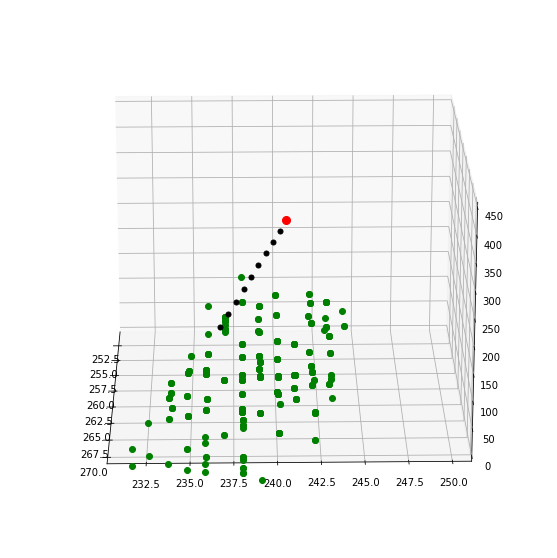

In [46]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_All_001[:,0], GCcoor_All_001[:,1], GCcoor_All_001[:,2],'og')
ax.plot(somas[0,0], somas[0,1], somas[0,2],'or', markersize=8)
ax.plot(MLIcellAll_001[:,0], MLIcellAll_001[:,1], MLIcellAll_001[:,2],'ok', markersize=5)
ax.set(xlim=np.array([-10, 10])+somas[0,0], 
       ylim=np.array([-10, 10])+somas[0,1],
       zlim=[0, 450])

for ii in trange(0,360,1):
    ax.view_init(elev=20., azim=ii)
    plt.savefig("movie_figs/movie%d.png" % ii)

In [47]:
GCcellAll_091=[]
for  i in range(len(tb.source)):
    if (tb.target[i]==0) and (tb.branch[i]==9) and (tb.segment[i]==1):
        GCcell= [tb.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_091.extend(GCcell)

In [48]:
GCcoor_091_All=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll_091)):
    GCcoor_091=(gc[GCcellAll_091[i]])
    GCcoor_091_All = np.vstack((GCcoor_091_All ,GCcoor_091))

In [49]:
MLIcellAll_091=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==0) and (seg100[i,0]==1) and (seg100[i,1]==9):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_091 = np.vstack((MLIcellAll_091 ,MLIcell))





In [50]:
MLIcellAll_091

array([[420.25519607141223, 205.4751777426792, 311.3887485681651],
       [422.20346777037753, 205.04585210063118, 311.24762139115467],
       [424.15173946934283, 204.61652645858317, 311.1064942141443],
       [426.10001116830813, 204.18720081653515, 310.96536703713383],
       [428.04828286727343, 203.75787517448714, 310.8242398601234],
       [429.99655456623873, 203.32854953243913, 310.683112683113],
       [431.94482626520403, 202.8992238903911, 310.54198550610255],
       [433.8930979641693, 202.46989824834307, 310.4008583290921],
       [435.8413696631346, 202.04057260629506, 310.2597311520817]],
      dtype=object)

100%|██████████| 360/360 [00:27<00:00, 13.16it/s]


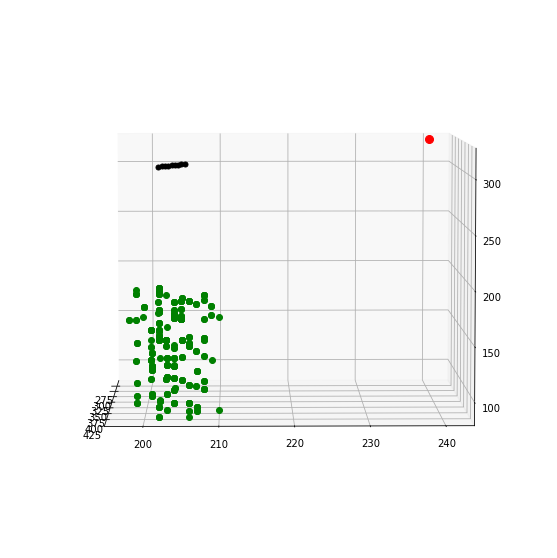

In [51]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_091_All[:,0], GCcoor_091_All[:,1], GCcoor_091_All[:,2],'og')
ax.plot(somas[0,0], somas[0,1], somas[0,2],'or', markersize=8)
ax.plot(MLIcellAll_091[:,0], MLIcellAll_091[:,1], MLIcellAll_091[:,2],'ok', markersize=5)

for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs_1/movie%d.png" % ii)

### PF to MLI

In [52]:
pf = pd.read_hdf('../connection_test_20210707/PFtoMLI.h5', "connection")
pf

,source,target,segment,branch,distance
0,603191,0,1,0,1029.554812
1,389935,0,1,0,391.554812
2,457648,0,1,0,828.554812
3,463007,0,1,0,828.554812
4,496893,0,1,0,290.445188
...,...,...,...,...,...
13192038,732684,99,4,9,1215.786000
13192039,650855,99,4,9,1203.786000
13192040,795727,99,4,9,320.214000
13192041,397990,99,4,9,1006.786000


In [53]:
GCcellAll_091_PF=[]
for  i in range(len(pf.source)):
    if (pf.target[i]==0) and (pf.branch[i]==9) and (pf.segment[i]==1):
        GCcell= [pf.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_091_PF.extend(GCcell)

In [54]:
GCcoor_091_All_PF=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll_091_PF)):
    GCcoor_091=(gc[GCcellAll_091_PF[i]])
    GCcoor_091_All_PF = np.vstack((GCcoor_091_All_PF ,GCcoor_091))

In [55]:
MLIcellAll_091_PF=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==0) and (seg100[i,0]==1) and (seg100[i,1]==9):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_091_PF = np.vstack((MLIcellAll_091_PF ,MLIcell))






100%|██████████| 360/360 [00:31<00:00, 11.35it/s]


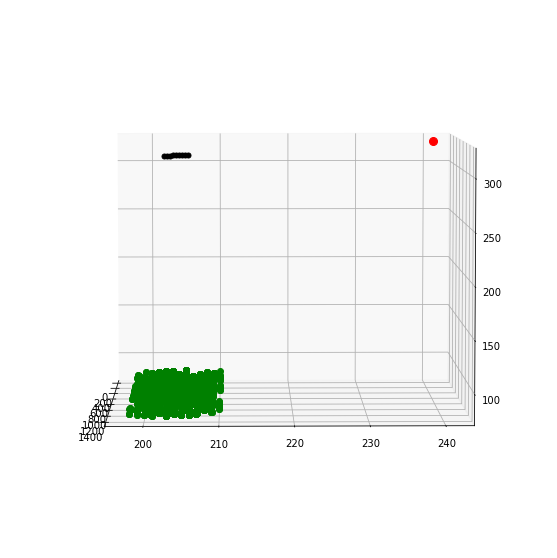

In [56]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_091_All_PF[:,0], GCcoor_091_All_PF[:,1], GCcoor_091_All_PF[:,2],'og')
ax.plot(somas[0,0], somas[0,1], somas[0,2],'or', markersize=8)
ax.plot(MLIcellAll_091_PF[:,0], MLIcellAll_091_PF[:,1], MLIcellAll_091_PF[:,2],'ok', markersize=5)

for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs/movie%d.png" % ii)

In [57]:
GCcellAll_45_5_3_PF=[]
for  i in range(len(pf.source)):
    if (pf.target[i]==45) and (pf.branch[i]==5) and (pf.segment[i]==3):
        GCcell= [pf.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_45_5_3_PF.extend(GCcell)

In [58]:
GCcoor_45_5_3_All_PF=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll_45_5_3_PF)):
    GCcoor_45_5_3=(gc[GCcellAll_45_5_3_PF[i]])
    GCcoor_45_5_3_All_PF = np.vstack((GCcoor_45_5_3_All_PF ,GCcoor_45_5_3))

In [59]:
MLIcellAll_45_5_3_PF=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==45) and (seg100[i,0]==3) and (seg100[i,1]==5):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_45_5_3_PF = np.vstack((MLIcellAll_45_5_3_PF ,MLIcell))







In [60]:
MLIcellAll_45__3_PF=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==45) and (seg100[i,0]==3):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_45__3_PF = np.vstack((MLIcellAll_45__3_PF ,MLIcell))


In [61]:
MLIcellAll_45__3_PF.shape

(90, 3)

100%|██████████| 360/360 [00:35<00:00, 10.17it/s]


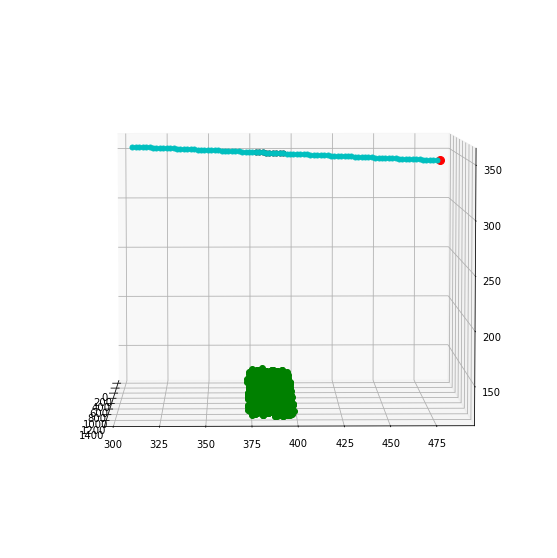

In [62]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_45_5_3_All_PF[:,0], GCcoor_45_5_3_All_PF[:,1], GCcoor_45_5_3_All_PF[:,2],'og')
ax.plot(somas[45,0], somas[45,1], somas[45,2],'or', markersize=8)
ax.plot(MLIcellAll_45_5_3_PF[:,0], MLIcellAll_45_5_3_PF[:,1], MLIcellAll_45_5_3_PF[:,2],'ok', markersize=5)
ax.plot(MLIcellAll_45__3_PF[:,0], MLIcellAll_45__3_PF[:,1], MLIcellAll_45__3_PF[:,2],'oc', markersize=5)


for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs_1/movie%d.png" % ii)

In [129]:
GCcellAll_87_2_4_PF=[]
for  i in range(len(pf.source)):
    if (pf.target[i]==87) and (pf.branch[i]==2) and (pf.segment[i]==4):
        GCcell= [pf.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_87_2_4_PF.extend(GCcell)
        
GCcoor_87_2_4_All_PF=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll_87_2_4_PF)):
    GCcoor_87_2_4=(gc[GCcellAll_87_2_4_PF[i]])
    GCcoor_87_2_4_All_PF = np.vstack((GCcoor_87_2_4_All_PF ,GCcoor_87_2_4))  


In [123]:
MLIcellAll_87_2_4_PF=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==87) and (seg100[i,0]==4) and (seg100[i,1]==2):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_87_2_4_PF = np.vstack((MLIcellAll_87_2_4_PF ,MLIcell))








In [127]:
seg100

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [4, 9],
       [4, 9],
       [4, 9]])

100%|██████████| 360/360 [00:35<00:00, 10.22it/s]


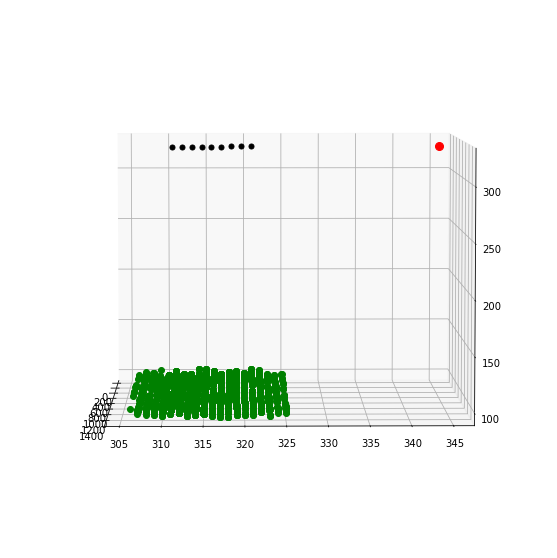

In [130]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_87_2_4_All_PF[:,0], GCcoor_87_2_4_All_PF[:,1], GCcoor_87_2_4_All_PF[:,2],'og')
ax.plot(somas[87,0], somas[87,1], somas[87,2],'or', markersize=8)
ax.plot(MLIcellAll_87_2_4_PF[:,0], MLIcellAll_87_2_4_PF[:,1], MLIcellAll_87_2_4_PF[:,2],'ok', markersize=5)

for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs_1/movie%d.png" % ii)

#### Amount of connections?

In [64]:
nsource_pf = pf.groupby('target').count().source

In [65]:
pf[pf.target==0].shape

(138191, 5)

In [66]:
nsource_pf.mean()

131920.43

In [67]:
nsource_aa = tb.groupby('target').count().source
nsource_aa.mean()

9835.92

## 2micro AA to MLI

In [74]:
aa2 = pd.read_hdf('../connection_test_dist2_20210715 _first/AAtoMLI.h5', "connection")
aa2

,source,target,segment,branch,distance
0,196070,0,1,0,124.820050
1,447092,0,1,0,152.820050
2,704666,0,1,0,123.678923
3,639254,0,1,0,218.537796
4,240744,0,1,0,153.537796
...,...,...,...,...,...
39237,699303,99,4,9,153.063641
39238,271047,99,4,9,73.063641
39239,421237,99,4,9,192.900999
39240,774330,99,4,9,81.900999


In [75]:
##Amount of connections from one MLI to AAs
nsource_aa2 = aa2.groupby('target').count().source
nsource_aa2.mean()

392.42

## 2microm PF to MLI

In [85]:
pf2 = pd.read_hdf('../connection_test_dist2_20210715 _first/PFtoMLI.h5', "connection")
pf2

,source,target,segment,branch,distance
0,489132,0,1,0,424.554812
1,187803,0,1,0,1033.554812
2,220640,0,1,0,830.554812
3,751902,0,1,0,938.554812
4,2214,0,1,0,372.445188
...,...,...,...,...,...
2110173,375491,99,4,9,1050.786000
2110174,140751,99,4,9,1084.786000
2110175,522445,99,4,9,518.786000
2110176,4112,99,4,9,1159.786000


In [86]:
##Amount of connections from one MLI to PFs
nsource_pf2 = pf2.groupby('target').count().source
nsource_pf2.mean()

21101.78

## 1microm AA to MLI

In [87]:
aa1 = pd.read_hdf('../connection_test_dist1_20210715/AAtoMLI.h5', "connection")
aa1

,source,target,segment,branch,distance
0,196070,0,1,0,124.820050
1,447092,0,1,0,152.820050
2,704666,0,1,0,123.678923
3,639254,0,1,0,218.537796
4,240744,0,1,0,153.537796
...,...,...,...,...,...
39237,699303,99,4,9,153.063641
39238,271047,99,4,9,73.063641
39239,421237,99,4,9,192.900999
39240,774330,99,4,9,81.900999


In [88]:
##Amount of connections from one MLI to PFs
nsource_aa1 = aa1.groupby('target').count().source
nsource_aa1.mean()

392.42

## 1microm PF to MLI

In [89]:
pf1 = pd.read_hdf('../connection_test_dist1_20210715/PFtoMLI.h5', "connection")
pf1

,source,target,segment,branch,distance
0,2214,0,1,0,372.445188
1,1928,0,1,0,624.554812
2,119702,0,1,0,1158.554812
3,232164,0,1,0,1053.554812
4,238986,0,1,0,1132.554812
...,...,...,...,...,...
527141,79202,99,4,9,864.786000
527142,22744,99,4,9,612.786000
527143,60625,99,4,9,1147.786000
527144,611573,99,4,9,231.786000


In [90]:
##Amount of connections from one MLI to PFs
nsource_pf1 = pf1.groupby('target').count().source
nsource_pf1.mean()

5271.46

## 0.5 microm AA to MLI

In [91]:
aa05 = pd.read_hdf('../connection_test_dist05_20210715/AAtoMLI.h5', "connection")
aa05

,source,target,segment,branch,distance
0,8645,0,1,0,170.396668
1,68383,0,1,1,200.549905
2,221483,0,1,1,150.408778
3,124025,0,1,1,199.408778
4,63845,0,1,1,140.408778
...,...,...,...,...,...
9625,724214,99,4,8,223.527417
9626,54284,99,4,9,164.039492
9627,18903,99,4,9,179.714208
9628,341606,99,4,9,176.226283


In [92]:
##Amount of connections from one MLI to PFs
nsource_aa05 = aa05.groupby('target').count().source
nsource_aa05.mean()

96.3

## 0.5 microm PF to MLI

In [175]:
pf05 = pd.read_hdf('../connection_test_dist05_20210715/PFtoMLI.h5', "connection")
pf05

,source,target,segment,branch,distance
0,1928,0,1,0,624.554812
1,5168,0,1,0,399.554812
2,717609,0,1,0,274.445188
3,1928,0,1,0,622.606540
4,5168,0,1,0,397.606540
...,...,...,...,...,...
131632,412158,99,4,9,302.786000
131633,79202,99,4,9,864.786000
131634,22744,99,4,9,612.786000
131635,611573,99,4,9,231.786000


In [176]:
##Amount of connections from one MLI to PFs
nsource_pf05 = pf05.groupby('target').count().source
nsource_pf05.mean()

1316.37

## Boxplot PF

In [186]:
pf05_nSource=np.array([nsource_pf05])
pf05_nSource=np.reshape(pf05_nSource, [100, 1])
pf05_nSource.shape

(100, 1)

In [187]:
pf1_nSource=np.array([nsource_pf1])
pf1_nSource=np.reshape(pf1_nSource, [100, 1])
pf1_nSource.shape

(100, 1)

In [211]:
pf2_nSource=np.array([nsource_pf2])
pf2_nSource=np.reshape(pf2_nSource, [100, 1])
pf2_nSource.shape

(100, 1)

In [212]:
#merge all PF settings in one array
nSourceAll=np.concatenate((pf05_nSource, pf1_nSource, pf2_nSource), axis=1)
nSourceAll.shape

(100, 3)

In [202]:
pf05_nSource[0:5]

array([[1316],
       [ 951],
       [1450],
       [1110],
       [ 983]])

In [213]:
print(nsource_pf05.mean(),nsource_pf1.mean(), nsource_pf2.mean())

1316.37 5271.46 21101.78


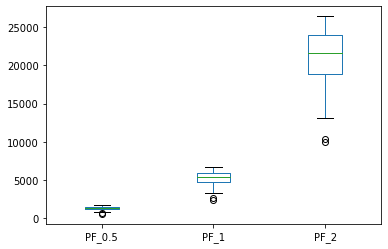

In [220]:

df = pd.DataFrame(nSourceAll, columns=['PF_0.5', 'PF_1', 'PF_2'])
ax = df.plot.box()


## Boxplot PF and AA 0.5

In [218]:
aa05_nSource=np.array([nsource_aa05])
aa05_nSource=np.reshape(aa05_nSource, [100, 1])
aa05_nSource.shape

(100, 1)

In [219]:
#merge PF  and AA in one array
nSource05=np.concatenate((pf05_nSource, aa05_nSource), axis=1)
nSource05.shape

(100, 2)

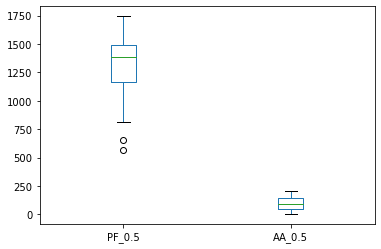

In [221]:
df = pd.DataFrame(nSource05, columns=['PF_0.5', 'AA_0.5'])
ax = df.plot.box()